# (1) Data Description 

This data set contains data about PlaiCraft, containing data about the information the player used to sign up and each individual session of plaicraft that occured.

### Players CSV
This file contains data about the players/users sign-up information from plaicraft
- 197 observations
- 9 variables 

#### Variables
| Experience (character) | Subscribe (logical) | hashedEmail (character) | played_hours (double precision) | name (character) | gender (character) | age (double precision) | individualid (logical) | organizationName (logical) |
| ---------- | --------- | ----------- | ------------ | ---- | ------ | --- | ------------ | ---------------- |
| How familiar the player is with minecraft | Whether player has subscribed to PlaiCraft's email updates| Encrypted email address of the player | How many hours the player has spent playing PlaiCraft | Name of the player | Gender of the player | Age of the player | ID of the player | Organization that the player belongs to|

#### Issues 
- no values for individualid and organizationName and therefore only consists of NA values

### Sessions CSV

This file contains data about each individual session in plaicraft. 
- 1536 observations
- 5 variables

#### Variables
| hashedEmail (character) | start_time (character) | end_time (character) | original_start_time (double precision) | original_end_time (double precision) |
| ----------- | ---------- | -------- | ------------------- | ----------------- |
| Encrypted email adress of the player | Time and date when player started a session | Time and date when player ended a session | Start time in Unix Timestamp Format | End Time in Unix Timestamp Format |

#### Issues
- start_time and end_time are not in UTC format
- original_start_time and original_end_time values are not precise enough and therefore the time recorded is not completely accurate, this is an issue with how the data was collected


# (2) Question

## Question 1: 
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

### Response variable
 - Played Hours

### Explanatory variables
 - Age
 - Experience
 - Gender

This data will help explain this question as using the data of players age's, experience, and gender can help predict what kind of player will play the most hours, meaning that they are likely to contribute a large amount of data.

In order to apply predictive methods to this data set I will need to change the experience, age, and gender into numerical values in order to apply KNN Regression to the problem.

# (3) Exploratory Data Analysis and Visualization

In [5]:
library(tidyverse)

players <- read_csv ("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
head(players)
sessions <- read_csv ("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")
head(sessions)

options(repr.plot.width = 14, repr.plot.height = 7)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


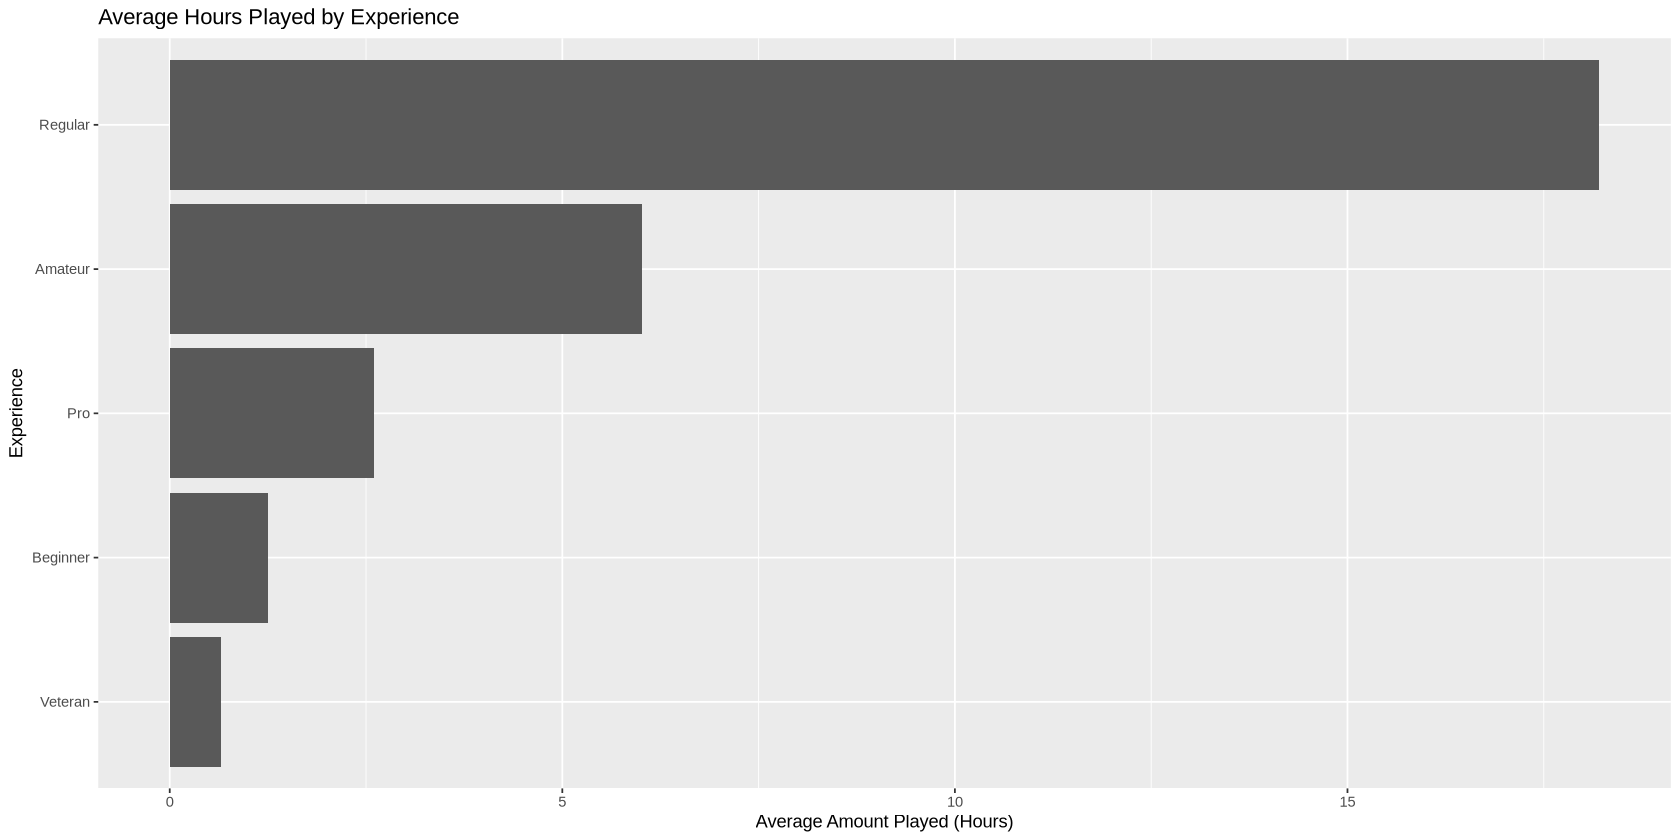

In [2]:
experience_hours_plot <- players |>
                group_by(experience) |>
                summarize(played_hours_avg = mean(played_hours)) |>
                ggplot(aes(x = played_hours_avg, y = fct_reorder(experience, played_hours_avg))) +
                geom_bar(stat = "identity") +
                labs(x = "Average Amount Played (Hours)", y = "Experience") +
                ggtitle("Average Hours Played by Experience")
experience_hours_plot

This plot shows the average amount of hours played by each experience. From this plot it is shown that players with regular prior experience in Minecraft play more hours on average in PlaiCraft.

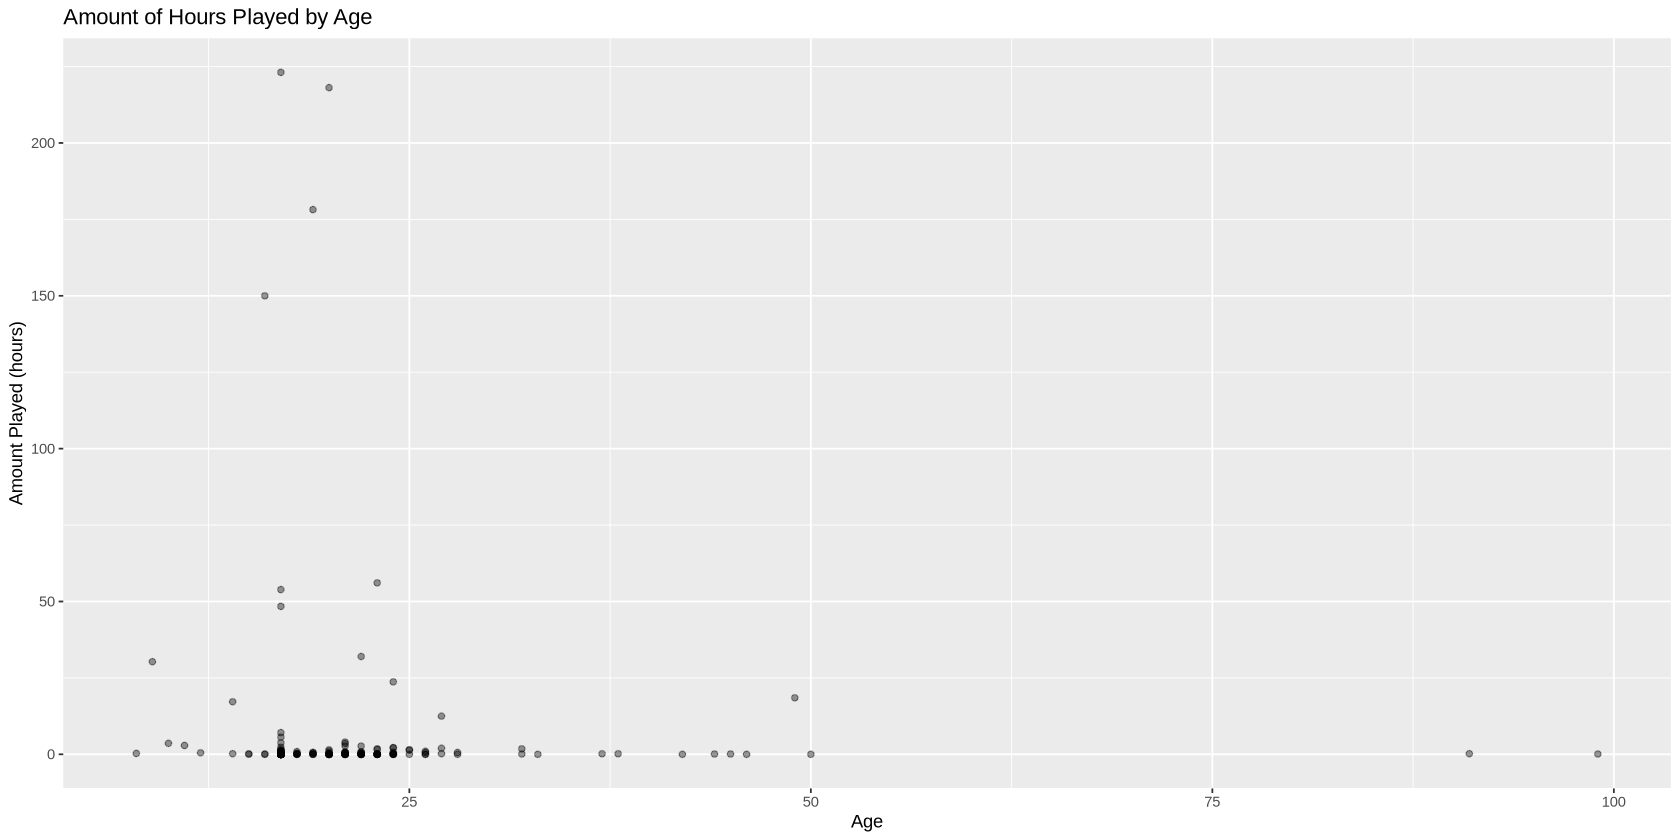

In [3]:
age_hours_plot <- players |>
                ggplot(aes(x = age, y = played_hours)) +
                geom_point(alpha = 0.4) +
                labs(x = "Age", y = "Amount Played (hours)") +
                ggtitle("Amount of Hours Played by Age")
age_hours_plot

This plot shows the amount of hours played depending on age. From this plot it is shown that there isn't much of a relationship between the amount of hours played and age.

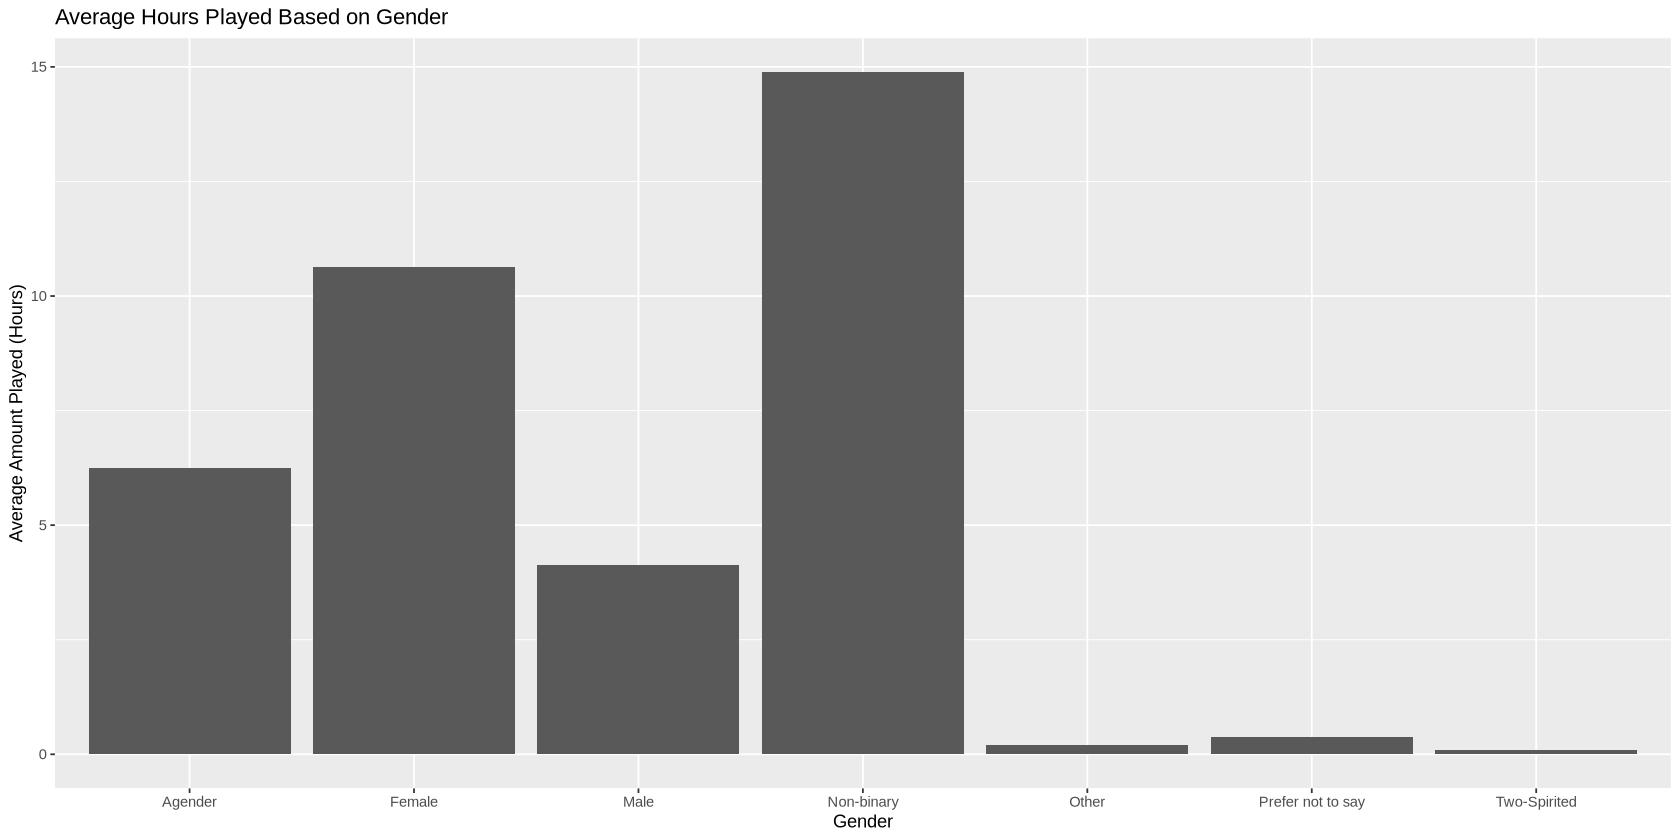

In [4]:
gender_hours_plot <- players |>
                group_by(gender) |>
                summarize(played_hours_avg = mean(played_hours)) |>
                ggplot(aes(x = gender, y = played_hours_avg)) +
                geom_bar(stat = "identity") +
                labs(x = "Gender", y = "Average Amount Played (Hours)") +
                ggtitle("Average Hours Played Based on Gender")
gender_hours_plot

This plot shows the average amount of hours played by gender. From this plot it is shown that on average non-binary players are more likely to play more hours.

# (4) Methods and Plan

One Method to address this question is to do a KNN Regression on the players data set.

- This method is appropriate as we can use the regression model to predict how many hours a player will play, meaning predicting a numerical value,  based on their experience, age, and gender
- Some assumptions required are that the data in the players data set were correctly and truthfully inputted when the user signed up for PlaiCraft
- A limitation of the method selected is it may not predict well beyond the range of values inputted in the training data, and it also might become very slow as the training data set gets larger.
- I am going to compare and select the model by tuning the model to find the best K value. I will also compare using the tuned KNN Regression model and a multivariable linear regression model to compare which has the lowest RMSE in order to figure out the best model.
- To process the data I will have to split the data into a 70% training set and 30% testing set, standardize the values in the recipe, and use a 5 fold cross validation in order to find the best K value